<a href="https://colab.research.google.com/github/Alex-Bernal27/Colab/blob/main/IAP_Segundo_Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. **(30 puntos)** El conjunto de datos "DatosNoEtiquetados.csv" esta conformado por textos pre-limpiados provenientes de tweets dirigidos a distintas aerolineas. Asigna a cada texto un sentimiento (negative/positive). Describe la metodologia/ideas que estas empleando.

Nota 1: Los 3 alumnos con los accuracy mas altos tendran 20-15-10 puntos extras respectivamente.

Nota 2: Idealmente usar tecnicas no supervisadas o heuristicas. Tambien es valido usar tecnicas supervisadas que no usen redes neuronales.

Nota 3: Enviar un csv con dos columnas
la primera es la misma columna de "DatosNoEtiquetados.csv" y la segunda columna con header "Sentiment" debe contener las etiquetas asignadas (negative/positive). El archivo debe llamarse "ApellidoP2.csv"

# Explicacion del metodo
El metodo que usé para asignar una etiqueta a los datos fue buscar por cada texto una palabra que estaba en un csv que contiene una lista de palabras de opinión negativas que fueron encontradas de otros programas como las más comunes en textos negativos.
Se puede ver que hay muchas palabras mal escritas en la lista y no son errores se incluyen a medida que aparecen estas palabras mal escritas con frecuencia en el contenido de Twitter.
Y aunque aparición de una palabra de opinión en una oración no necesariamente significa que la oración expresa una opinión positiva o negativa es un buen metodo ya que pienso que si hay palabras que siempre estan arraigadas a algo malo o bueno. 

In [ ]:
NegWords = pd.read_csv("NegativeWords.csv")
def mi_etiquetador(txt):
  for neg in NegWords['Words']:
    for word in txt.split():
      if word == neg:
        return 'negative'
  return 'positive'

In [ ]:
## CORRER ESTA PARTE UNA VEZ QUE EL MODELO "model" ESTE ENTRENADO
dataVal = pd.read_csv("DatosNoEtiquetados.csv") # Lectura datos no etiquetados
val_lab = [mi_etiquetador(txt) for txt in dataVal['Text']]
# Guardar el archivo
dataVal['Sentiment'] = val_lab
dataVal.to_csv("BernalP2.csv")

# 3. **(50 puntos)** El conjunto de datos "DatosEtiquetados.csv" esta conformado por textos pre-limpiados provenientes de tweets dirigidos a distintas aerolineas, además cada uno de los textos tiene asociado un sentimiento (negative/positive). Utiliza  "DatosEtiquetados.csv" para entrenar un modelo con redes neuronales recurrentes para asignar etiquetas al conjunto "DatosNoEtiquetados.csv"


Nota: Los 3 alumnos con los accuracy mas altos tendran 20-15-10 puntos extras respectivamente.

Nota 2: Enviar un csv con dos columnas
la primera es la misma columna de "DatosNoEtiquetados.csv" y la segunda columna con header "Sentiment" debe contener las etiquetas asignadas (negative/positive). El archivo debe llamarse "ApellidoP3.csv" (ver codigo adjunto)


In [ ]:
## Usar GPU

In [ ]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import re

In [ ]:
# Lectura
import pandas as pd
data = pd.read_csv("DatosEtiquetados.csv")

In [ ]:
# Preproceso
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['Text'].values)
X = tokenizer.texts_to_sequences(data['Text'].values)
X = pad_sequences(X,padding='post')
Y = pd.get_dummies(data['Sentiment']).values

In [ ]:
# (4000,30) 4000 textos con 30 elementos cada texto
X.shape

(4000, 30)

In [ ]:
%tensorflow_version 2.x

In [ ]:
## DECLARACION Y COMPILACION DEL MODELO
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=4000, output_dim=128),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
## ENTRENAMIENTO DEL MODELO
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint
epochs=25
callback = [tf.keras.callbacks.ModelCheckpoint("model.weights.best.hdf5", monitor='accuracy', save_best_only=True, mode='max')]
model.fit(X, Y, batch_size=32, epochs=epochs, callbacks=callback)

Epoch 1/25
125/125 [==============================] - 1s 9ms/step - loss: 0.0115 - accuracy: 0.9975
Epoch 2/25
125/125 [==============================] - 1s 9ms/step - loss: 0.0113 - accuracy: 0.9973
Epoch 3/25
125/125 [==============================] - 1s 9ms/step - loss: 0.0319 - accuracy: 0.9887
Epoch 4/25
125/125 [==============================] - 1s 10ms/step - loss: 0.0299 - accuracy: 0.9910
Epoch 5/25
125/125 [==============================] - 1s 10ms/step - loss: 0.0221 - accuracy: 0.9933
Epoch 6/25
125/125 [==============================] - 1s 9ms/step - loss: 0.0134 - accuracy: 0.9960
Epoch 7/25
125/125 [==============================] - 1s 10ms/step - loss: 0.0116 - accuracy: 0.9973
Epoch 8/25
125/125 [==============================] - 1s 9ms/step - loss: 0.0215 - accuracy: 0.9930
Epoch 9/25
125/125 [==============================] - 1s 10ms/step - loss: 0.0138 - accuracy: 0.9967
Epoch 10/25
125/125 [==============================] - 1s 10ms/step - loss: 0.0095 - accuracy: 0

In [ ]:
## CORRER ESTA PARTE UNA VEZ QUE EL MODELO "model" ESTE ENTRENADO
dataVal = pd.read_csv("DatosNoEtiquetados.csv") # Lectura datos no etiquetados
X_val = tokenizer.texts_to_sequences(dataVal['Text']) # Tokenizar
X_val = pad_sequences(X_val,maxlen=30,padding='post') # Padding 30 elementos
Y_val = model.predict(X_val) # model es el modelo que creaste y entrenaste
# Obtener las labels
map_num2lab = {0:'negative',1:'positive'}
Y_val_lab = [map_num2lab[np.argmax(x)] for x in Y_val]
# Guardar el archivo
dataVal['Sentiment'] = Y_val_lab
dataVal.to_csv("BernalP3.csv")

In [ ]:
# x in Y_val es cada [p_0 , p_1]
# x = [9.9999797e-01, 2.0141069e-06]
# x = [4.8973561e-05, 9.9995100e-01]
# ...
# x = [4.8973561e-05, 9.9995100e-01]
# x = [9.9999797e-01, 2.0610623e-06]

# np.argmax(x) es el indice con el elemento mayor

# np.argmax(x) = np.argmax([9.9999797e-01, 2.0141069e-06]) = 0 

# map_num2lab[np.argmax(x)] = map_num2lab[np.argmax([9.9999797e-01, 2.0141069e-06])]
#                           = map_num2lab[0] = 'negative'


Las siguientes lineas de codigo se usaran para revisar el rendimiento del etiquetado presentado.

In [ ]:
dataAns = pd.read_csv("BernalP2.csv")

In [ ]:
dataAns['Student'] = dataVal['Sentiment']

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(dataAns['Sentiment'],dataAns['Student'])

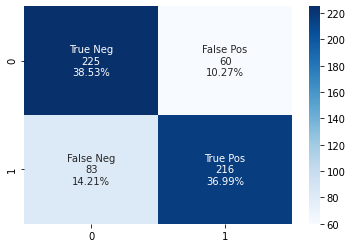

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
sum(sum(cf_matrix))

584

In [ ]:
100* (cf_matrix[0,0] + cf_matrix[1,1] ) / sum(sum(cf_matrix))

75.51369863013699